In [1]:
import torch
import torch.nn as nn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv("../../Data/NYCTaxiFares.csv")
df.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2010-04-19 08:17:56 UTC,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1
1,2010-04-17 15:43:53 UTC,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1
2,2010-04-17 11:23:26 UTC,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2
3,2010-04-11 21:25:03 UTC,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1
4,2010-04-17 02:19:01 UTC,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1


In [3]:
df["fare_amount"].describe()

count    120000.000000
mean         10.040326
std           7.500134
min           2.500000
25%           5.700000
50%           7.700000
75%          11.300000
max          49.900000
Name: fare_amount, dtype: float64

In [4]:
df["fare_amount"].describe()

count    120000.000000
mean         10.040326
std           7.500134
min           2.500000
25%           5.700000
50%           7.700000
75%          11.300000
max          49.900000
Name: fare_amount, dtype: float64

In [5]:
def haversine_distance(df, lat1, long1, lat2, long2):
    """
    Calculates the haversine distance between 2 sets of GPS coordinates in df
    """
    r = 6371  # average radius of Earth in kilometers
       
    phi1 = np.radians(df[lat1])
    phi2 = np.radians(df[lat2])
    
    delta_phi = np.radians(df[lat2]-df[lat1])
    delta_lambda = np.radians(df[long2]-df[long1])
     
    a = np.sin(delta_phi/2)**2 + np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda/2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    d = (r * c) # in kilometers

    return d

In [6]:
df['dist_km'] = haversine_distance(df, 'pickup_latitude', 'pickup_latitude', 'pickup_latitude', 'dropoff_longitude')
df

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dist_km
0,2010-04-19 08:17:56 UTC,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1,8817.230754
1,2010-04-17 15:43:53 UTC,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1,8816.155549
2,2010-04-17 11:23:26 UTC,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2,8814.266578
3,2010-04-11 21:25:03 UTC,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1,8814.394753
4,2010-04-17 02:19:01 UTC,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1,8812.757560
...,...,...,...,...,...,...,...,...,...
119995,2010-04-18 14:33:03 UTC,15.3,1,-73.955857,40.784590,-73.981941,40.736789,1,8812.214893
119996,2010-04-23 10:27:48 UTC,15.3,1,-73.996329,40.772727,-74.049890,40.740413,1,8817.403975
119997,2010-04-18 18:50:40 UTC,12.5,1,-73.988574,40.749772,-74.011541,40.707799,3,8817.437396
119998,2010-04-13 08:14:44 UTC,4.9,0,-74.004449,40.724529,-73.992697,40.730765,1,8818.843174


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   pickup_datetime    120000 non-null  object 
 1   fare_amount        120000 non-null  float64
 2   fare_class         120000 non-null  int64  
 3   pickup_longitude   120000 non-null  float64
 4   pickup_latitude    120000 non-null  float64
 5   dropoff_longitude  120000 non-null  float64
 6   dropoff_latitude   120000 non-null  float64
 7   passenger_count    120000 non-null  int64  
 8   dist_km            120000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 8.2+ MB


In [8]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   pickup_datetime    120000 non-null  datetime64[ns, UTC]
 1   fare_amount        120000 non-null  float64            
 2   fare_class         120000 non-null  int64              
 3   pickup_longitude   120000 non-null  float64            
 4   pickup_latitude    120000 non-null  float64            
 5   dropoff_longitude  120000 non-null  float64            
 6   dropoff_latitude   120000 non-null  float64            
 7   passenger_count    120000 non-null  int64              
 8   dist_km            120000 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(6), int64(2)
memory usage: 8.2 MB


In [9]:
my_time = df['pickup_datetime'][0]
print(my_time)
my_time.hour

2010-04-19 08:17:56+00:00


8

In [10]:
# THere is 4 hour difference between the UTC & EDT time the EDT time is for new work and this case is for New work
df['EDTdate'] = df['pickup_datetime'] - pd.Timedelta(hours=4)
#Get the Hour
df['Hour'] = df['EDTdate'].dt.hour
#Get the AM or PM
df['AMorPM'] = np.where(df['Hour'] < 12, 'am', 'pm')
df.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dist_km,EDTdate,Hour,AMorPM
0,2010-04-19 08:17:56+00:00,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1,8817.230754,2010-04-19 04:17:56+00:00,4,am
1,2010-04-17 15:43:53+00:00,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1,8816.155549,2010-04-17 11:43:53+00:00,11,am
2,2010-04-17 11:23:26+00:00,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2,8814.266578,2010-04-17 07:23:26+00:00,7,am
3,2010-04-11 21:25:03+00:00,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1,8814.394753,2010-04-11 17:25:03+00:00,17,pm
4,2010-04-17 02:19:01+00:00,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1,8812.757560,2010-04-16 22:19:01+00:00,22,pm


In [11]:
df['Weekday'] = df['EDTdate'].dt.strftime('%a')
df.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dist_km,EDTdate,Hour,AMorPM,Weekday
0,2010-04-19 08:17:56+00:00,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1,8817.230754,2010-04-19 04:17:56+00:00,4,am,Mon
1,2010-04-17 15:43:53+00:00,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1,8816.155549,2010-04-17 11:43:53+00:00,11,am,Sat
2,2010-04-17 11:23:26+00:00,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2,8814.266578,2010-04-17 07:23:26+00:00,7,am,Sat
3,2010-04-11 21:25:03+00:00,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1,8814.394753,2010-04-11 17:25:03+00:00,17,pm,Sun
4,2010-04-17 02:19:01+00:00,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1,8812.757560,2010-04-16 22:19:01+00:00,22,pm,Fri


In [12]:
cat_cols = ['Hour', 'AMorPM', 'Weekday']
cont_cols = ['pickup_longitude','pickup_latitude', 'dropoff_longitude', 'dropoff_latitude','passenger_count', 'dist_km']
y_col = ['fare_amount']

In [13]:
df.dtypes

pickup_datetime      datetime64[ns, UTC]
fare_amount                      float64
fare_class                         int64
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
dist_km                          float64
EDTdate              datetime64[ns, UTC]
Hour                               int32
AMorPM                            object
Weekday                           object
dtype: object

In [14]:
for cat in cat_cols:
    df[cat] = df[cat].astype('category')

df.dtypes

pickup_datetime      datetime64[ns, UTC]
fare_amount                      float64
fare_class                         int64
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
dist_km                          float64
EDTdate              datetime64[ns, UTC]
Hour                            category
AMorPM                          category
Weekday                         category
dtype: object

In [15]:
df["AMorPM"].cat.categories

Index(['am', 'pm'], dtype='object')

In [16]:
df["AMorPM"].cat.codes

0         0
1         0
2         0
3         1
4         1
         ..
119995    0
119996    0
119997    1
119998    0
119999    1
Length: 120000, dtype: int8

In [17]:
df["Weekday"].cat.categories

Index(['Fri', 'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed'], dtype='object')

In [18]:
df["Weekday"].cat.codes.values

array([1, 2, 2, ..., 3, 5, 2], dtype=int8)

In [19]:
hr = df["Hour"].cat.codes.values
ampm = df["AMorPM"].cat.codes.values
wkdy = df["Weekday"].cat.codes.values
cats = np.stack([hr,ampm,wkdy], axis=1)
cats

array([[ 4,  0,  1],
       [11,  0,  2],
       [ 7,  0,  2],
       ...,
       [14,  1,  3],
       [ 4,  0,  5],
       [12,  1,  2]], dtype=int8)

In [20]:
cats = torch.tensor(cats, dtype=torch.int64)
conts = torch.tensor(np.stack([df[col].values for col in cont_cols], axis=1), dtype=torch.float)
print(cats)
print(conts)

tensor([[ 4,  0,  1],
        [11,  0,  2],
        [ 7,  0,  2],
        ...,
        [14,  1,  3],
        [ 4,  0,  5],
        [12,  1,  2]])
tensor([[-7.3992e+01,  4.0731e+01, -7.3976e+01,  4.0745e+01,  1.0000e+00,
          8.8172e+03],
        [-7.3990e+01,  4.0741e+01, -7.3974e+01,  4.0744e+01,  1.0000e+00,
          8.8162e+03],
        [-7.3994e+01,  4.0751e+01, -7.3960e+01,  4.0766e+01,  2.0000e+00,
          8.8143e+03],
        ...,
        [-7.3989e+01,  4.0750e+01, -7.4012e+01,  4.0708e+01,  3.0000e+00,
          8.8174e+03],
        [-7.4004e+01,  4.0725e+01, -7.3993e+01,  4.0731e+01,  1.0000e+00,
          8.8188e+03],
        [-7.3955e+01,  4.0772e+01, -7.3968e+01,  4.0763e+01,  3.0000e+00,
          8.8126e+03]])


In [21]:
y = torch.tensor(df[y_col].values, dtype=torch.float).reshape(-1,1)
y

tensor([[ 6.5000],
        [ 6.9000],
        [10.1000],
        ...,
        [12.5000],
        [ 4.9000],
        [ 5.3000]])

In [22]:
print(cats.shape)
print(conts.shape)
print(y.shape)

torch.Size([120000, 3])
torch.Size([120000, 6])
torch.Size([120000, 1])


In [23]:
cat_szs = [len(df[col].cat.categories) for col in cat_cols]
emb_szs = [(size, min(50, (size+1)//2)) for size in cat_szs]
print(emb_szs)

[(24, 12), (2, 1), (7, 4)]


In [24]:
cats

tensor([[ 4,  0,  1],
        [11,  0,  2],
        [ 7,  0,  2],
        ...,
        [14,  1,  3],
        [ 4,  0,  5],
        [12,  1,  2]])

In [25]:
selfembds = nn.ModuleList([nn.Embedding(ni, nf) for ni, nf in emb_szs])
selfembds

ModuleList(
  (0): Embedding(24, 12)
  (1): Embedding(2, 1)
  (2): Embedding(7, 4)
)

In [26]:
cats[:, 0]

tensor([ 4, 11,  7,  ..., 14,  4, 12])

In [27]:
cats

tensor([[ 4,  0,  1],
        [11,  0,  2],
        [ 7,  0,  2],
        ...,
        [14,  1,  3],
        [ 4,  0,  5],
        [12,  1,  2]])

In [28]:
embeddingz = []

for i, e in enumerate(selfembds):
    # print(i, e)
    print(e)
    embeddingz.append(e(cats[:, i]))

embeddingz

Embedding(24, 12)
Embedding(2, 1)
Embedding(7, 4)


[tensor([[-0.2435,  0.3865,  1.4492,  ...,  0.7175,  0.9684,  0.0342],
         [ 1.5060,  1.2271,  0.2355,  ...,  0.2746, -0.7303, -0.2109],
         [-0.2475,  0.9304, -0.5729,  ..., -0.2827,  0.3204, -0.6236],
         ...,
         [ 1.3237,  0.7967,  0.3633,  ...,  1.0173, -1.6732, -0.3161],
         [-0.2435,  0.3865,  1.4492,  ...,  0.7175,  0.9684,  0.0342],
         [ 0.0738,  0.6286,  1.4451,  ..., -0.3795,  1.9802,  0.4401]],
        grad_fn=<EmbeddingBackward0>),
 tensor([[0.2922],
         [0.2922],
         [0.2922],
         ...,
         [0.7781],
         [0.2922],
         [0.7781]], grad_fn=<EmbeddingBackward0>),
 tensor([[-1.3465, -0.2459, -1.1515,  0.1717],
         [ 0.3380,  1.6000, -0.0038,  1.4689],
         [ 0.3380,  1.6000, -0.0038,  1.4689],
         ...,
         [-1.3680,  2.8636, -2.4401,  2.7351],
         [-0.6162, -1.1402, -1.1707, -1.3634],
         [ 0.3380,  1.6000, -0.0038,  1.4689]], grad_fn=<EmbeddingBackward0>)]

In [29]:
embeddingz[2].shape

torch.Size([120000, 4])

In [30]:
embeddingz[2][1].shape

torch.Size([4])

In [31]:
# We concatenate the embedding sections (12,1,4) into one (17)
z = torch.cat(embeddingz, 1)
z

tensor([[-0.2435,  0.3865,  1.4492,  ..., -0.2459, -1.1515,  0.1717],
        [ 1.5060,  1.2271,  0.2355,  ...,  1.6000, -0.0038,  1.4689],
        [-0.2475,  0.9304, -0.5729,  ...,  1.6000, -0.0038,  1.4689],
        ...,
        [ 1.3237,  0.7967,  0.3633,  ...,  2.8636, -2.4401,  2.7351],
        [-0.2435,  0.3865,  1.4492,  ..., -1.1402, -1.1707, -1.3634],
        [ 0.0738,  0.6286,  1.4451,  ...,  1.6000, -0.0038,  1.4689]],
       grad_fn=<CatBackward0>)

In [32]:
z[0].shape

torch.Size([17])

In [33]:
# This was assigned under the __init__() method
selfembdrop = nn.Dropout(.4)
selfembdrop

Dropout(p=0.4, inplace=False)

In [34]:
z = selfembdrop(z)
z

tensor([[-0.0000,  0.0000,  2.4153,  ..., -0.4098, -1.9191,  0.2862],
        [ 2.5100,  2.0451,  0.3924,  ...,  2.6666, -0.0064,  2.4482],
        [-0.4126,  1.5506, -0.9548,  ...,  2.6666, -0.0000,  2.4482],
        ...,
        [ 0.0000,  0.0000,  0.6055,  ...,  0.0000, -4.0669,  0.0000],
        [-0.4059,  0.0000,  2.4153,  ..., -1.9003, -1.9511, -2.2723],
        [ 0.1231,  1.0477,  0.0000,  ...,  2.6666, -0.0064,  2.4482]],
       grad_fn=<MulBackward0>)

In [76]:
# class TabularModel(nn.Module):
#     def __init__(self, embd_szs, n_count, out_sz, layers, p=0.5):
#         # layers [100, 200, 50] Define the layers so that this will construct the neural network accroding to that
#         super().__init__()
#         self.embeds = nn.ModuleList([nn.Embedding(ni, nf) for ni, nf in embd_szs])
#         self.emb_drop = nn.Dropout(p)
#         self.bn_cnt = nn.BatchNorm1d(n_count)

#         layer_list = []
#         n_emb = sum([nf for ni, nf in emb_szs])
#         n_in = n_emb + n_count
#         for i in layers:
#             layer_list.append(nn.Linear(n_in, i))
#             layer_list.append(nn.ReLU(inplace=True))
#             layer_list.append(nn.BatchNorm1d(i))
#             layer_list.append(nn.Dropout(p))
#             n_in = i
#         layer_list.append(nn.Linear(layers[-1], out_sz))

#         self.layers = nn.Sequential(*layer_list)

#     def forward(self, x_cat, x_cont):
#         embeddings = []

#         # print("Reaching hrere")
#         for i, e in enumerate(self.embeds):
#             # print("Inside the embedding append")
#             embeddings.append(e(x_cat[:,i]))
#         # print("Embedding done")
#         x = torch.cat(embeddings, 1)
#         x = self.emb_drop(x)
#         x_cont = self.bn_cont(x_cont)
#         x = torch.cat([x, x_cont], 1)
#         # print("before the layer config")
#         return self.layers(x)
    



class TabularModel(nn.Module):
    def __init__(self, embd_szs, n_count, out_sz, layers, p=0.5):
        # layers [100, 200, 50] Define the layers so that this will construct the neural network accroding to that
        super().__init__()
        self.embeds = nn.ModuleList([nn.Embedding(ni, nf) for ni, nf in embd_szs])
        self.embed_drop = nn.Dropout(p)
        self.bn_cnt = nn.BatchNorm1d(n_count)
        layerlist = []
        n_em = sum((nf for ni, nf in emb_szs))
        n_in = n_em + n_count
        for i in layers:
            layerlist.append(nn.Linear(n_in, i))
            layerlist.append(nn.ReLU(inplace=True))
            layerlist.append(nn.BatchNorm1d(i))
            layerlist.append(nn.Dropout(p))
            n_in = i
        layerlist.append(nn.Linear(layers[-1], out_sz))
        self.layer = nn.Sequential(*layerlist)

    def forward(self, x_cat, x_cont):
        embeddings = []
        for i, e in enumerate(self.embeds):
            embeddings.append(e(x_cat[:,i]))
        x = torch.cat(embeddings, 1)
        x = self.embed_drop(x)
        x_cont = self.bn_cnt(x_cont)
        x = torch.cat([x, x_cont], 1)
        return self.layer(x)
        

In [77]:
conts.shape[1]

6

In [78]:
torch.manual_seed(33)
model = TabularModel(emb_szs, conts.shape[1], 1, [300, 200, 100], p=0.4)
model

TabularModel(
  (embeds): ModuleList(
    (0): Embedding(24, 12)
    (1): Embedding(2, 1)
    (2): Embedding(7, 4)
  )
  (embed_drop): Dropout(p=0.4, inplace=False)
  (bn_cnt): BatchNorm1d(6, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layer): Sequential(
    (0): Linear(in_features=23, out_features=300, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(300, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.4, inplace=False)
    (4): Linear(in_features=300, out_features=200, bias=True)
    (5): ReLU(inplace=True)
    (6): BatchNorm1d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.4, inplace=False)
    (8): Linear(in_features=200, out_features=100, bias=True)
    (9): ReLU(inplace=True)
    (10): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): Dropout(p=0.4, inplace=False)
    (12): Linear(in_features=100, out_features=1, bias=True)
  

In [79]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

In [80]:
cats.shape

torch.Size([120000, 3])

In [81]:
cats[0].shape

torch.Size([3])

In [82]:
conts[0].shape

torch.Size([6])

In [83]:
batch_size = 60000
test_size = int(batch_size*0.2)

#DATA SHUFFLED ALREADY
cat_train = cats[:batch_size-test_size]
cat_test = cats[batch_size-test_size:batch_size]
cont_train = conts[:batch_size-test_size]
cont_test = conts[batch_size-test_size:batch_size]

#TARGET
y_train = y[:batch_size-test_size]
y_test = y[batch_size-test_size:batch_size]

In [84]:
cat_train.shape

torch.Size([48000, 3])

In [85]:
cont_train.shape

torch.Size([48000, 6])

In [86]:
import time

start_time = time.time()
epochs = 300
losses = []
for i in range(epochs):
    i += 1

    y_pred = model(cat_train, cont_train)
    loss = torch.sqrt(criterion(y_pred, y_train))
    losses.append(loss)

    if i%10 == 1:
        print(f"Epoch: {i:3}  loss:{loss.item():10.8f}")

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

print(f"Epoch: {i:3}  loss:{loss.item():10.8f}")
print(f"\n Training Duration {time.time() - start_time:.0f} seconds")

Epoch:   1  loss:12.50481606
Epoch:  11  loss:12.48821068
Epoch:  21  loss:12.47743797
Epoch:  31  loss:12.45737648
Epoch:  41  loss:12.44375610
Epoch:  51  loss:12.43320084
Epoch:  61  loss:12.40846443
Epoch:  71  loss:12.40009308
Epoch:  81  loss:12.38379669
Epoch:  91  loss:12.36476994
Epoch: 101  loss:12.35186291
Epoch: 111  loss:12.34135437
Epoch: 121  loss:12.31738281
Epoch: 131  loss:12.30039024
Epoch: 141  loss:12.28494549
Epoch: 151  loss:12.27267742
Epoch: 161  loss:12.25864506
Epoch: 171  loss:12.23033524
Epoch: 181  loss:12.21964073
Epoch: 191  loss:12.19906902
Epoch: 201  loss:12.18603230
Epoch: 211  loss:12.16951370
Epoch: 221  loss:12.15497303
Epoch: 231  loss:12.13458729
Epoch: 241  loss:12.11422920
Epoch: 251  loss:12.09980488
Epoch: 261  loss:12.08690929
Epoch: 271  loss:12.05955124
Epoch: 281  loss:12.04721737
Epoch: 291  loss:12.02831078
Epoch: 300  loss:12.00787067

 Training Duration 55 seconds


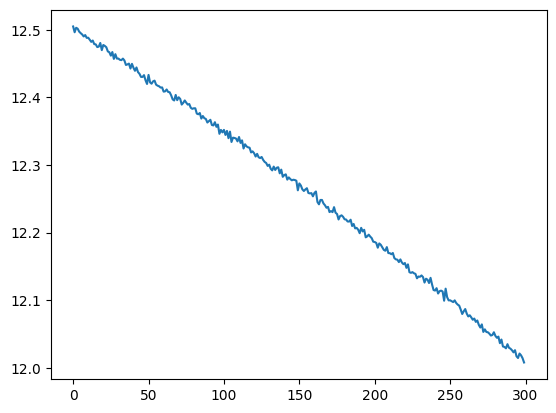

In [87]:
loss_numpy = [loss.detach().numpy() for loss in losses]
plt.plot(range(epochs), loss_numpy)

In [88]:
with torch.no_grad():
    y_eval = model(cat_test, cont_test)
    loss = torch.sqrt(criterion(y_test, y_eval))

print(f"RMSE : {loss:.8f}")

RMSE : 11.96187401


In [89]:
for i in range(10):
    diff = (y_test[i].item() - y_eval[i].item())
    print(f"{i}.) predicted {y_eval[i].item():8.2f} true values : {y_test[i].item():8.2f} Diff : {diff:8.2f}")

0.) predicted     0.89 true values :     2.90 Diff :     2.01
1.) predicted     3.15 true values :     5.70 Diff :     2.55
2.) predicted     0.63 true values :     7.70 Diff :     7.07
3.) predicted     0.01 true values :    12.50 Diff :    12.49
4.) predicted    -1.22 true values :     4.10 Diff :     5.32
5.) predicted     0.67 true values :     5.30 Diff :     4.63
6.) predicted    -0.19 true values :     3.70 Diff :     3.89
7.) predicted     0.80 true values :    14.50 Diff :    13.70
8.) predicted    -1.09 true values :     5.70 Diff :     6.79
9.) predicted     0.64 true values :    10.10 Diff :     9.46


In [90]:
torch.save(model.state_dict(), "TaxiFareRegrModel.pt")

### Loading the saved model for prediction

In [104]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd

def haversine_distance(df, lat1, long1, lat2, long2):
    r = 6371
    phi1 = np.radians(df[lat1])
    phi2 = np.radians(df[lat2])
    delta_phi = np.radians(df[lat2]-df[lat1])
    delta_lambda = np.radians(df[long2]-df[long1])
    a = np.sin(delta_phi/2)**2 + np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda/2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    return r * c

class TabularModel(nn.Module):
    def __init__(self, embd_szs, n_count, out_sz, layers, p=0.5):
        super().__init__()
        self.embeds = nn.ModuleList([nn.Embedding(ni, nf) for ni, nf in embd_szs])
        self.embed_drop = nn.Dropout(p)
        self.bn_cnt = nn.BatchNorm1d(n_count)
        layerlist = []
        n_em = sum((nf for ni, nf in emb_szs))
        n_in = n_em + n_count
        for i in layers:
            layerlist.append(nn.Linear(n_in, i))
            layerlist.append(nn.ReLU(inplace=True))
            layerlist.append(nn.BatchNorm1d(i))
            layerlist.append(nn.Dropout(p))
            n_in = i
        layerlist.append(nn.Linear(layers[-1], out_sz))
        self.layer = nn.Sequential(*layerlist)

    def forward(self, x_cat, x_cont):
        embeddings = []
        for i, e in enumerate(self.embeds):
            embeddings.append(e(x_cat[:,i]))
        x = torch.cat(embeddings, 1)
        x = self.embed_drop(x)
        x_cont = self.bn_cnt(x_cont)
        x = torch.cat([x, x_cont],1)
        return self.layer(x)
        

In [105]:
emb_szs = [(24, 12), (2, 1), (7, 4)]
model2 = TabularModel(emb_szs, 6, 1, [300, 200, 100], p=0.4)
model2

TabularModel(
  (embeds): ModuleList(
    (0): Embedding(24, 12)
    (1): Embedding(2, 1)
    (2): Embedding(7, 4)
  )
  (embed_drop): Dropout(p=0.4, inplace=False)
  (bn_cnt): BatchNorm1d(6, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layer): Sequential(
    (0): Linear(in_features=23, out_features=300, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(300, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.4, inplace=False)
    (4): Linear(in_features=300, out_features=200, bias=True)
    (5): ReLU(inplace=True)
    (6): BatchNorm1d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.4, inplace=False)
    (8): Linear(in_features=200, out_features=100, bias=True)
    (9): ReLU(inplace=True)
    (10): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): Dropout(p=0.4, inplace=False)
    (12): Linear(in_features=100, out_features=1, bias=True)
  

In [106]:
model2.load_state_dict(torch.load('TaxiFareRegrModel.pt'))
model2.eval() # be sure to run this step!

/var/folders/4s/hysfs9xj63g017jwkv_8y0lh0000gq/T/ipykernel_14345/1219904529.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model2.load_state_dict(torch.load('TaxiFareRe

TabularModel(
  (embeds): ModuleList(
    (0): Embedding(24, 12)
    (1): Embedding(2, 1)
    (2): Embedding(7, 4)
  )
  (embed_drop): Dropout(p=0.4, inplace=False)
  (bn_cnt): BatchNorm1d(6, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layer): Sequential(
    (0): Linear(in_features=23, out_features=300, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(300, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.4, inplace=False)
    (4): Linear(in_features=300, out_features=200, bias=True)
    (5): ReLU(inplace=True)
    (6): BatchNorm1d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.4, inplace=False)
    (8): Linear(in_features=200, out_features=100, bias=True)
    (9): ReLU(inplace=True)
    (10): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): Dropout(p=0.4, inplace=False)
    (12): Linear(in_features=100, out_features=1, bias=True)
  

In [107]:
def test_data(mdl): # pass in the name of the new model
    # INPUT NEW DATA
    plat = float(input('What is the pickup latitude?  '))
    plong = float(input('What is the pickup longitude? '))
    dlat = float(input('What is the dropoff latitude?  '))
    dlong = float(input('What is the dropoff longitude? '))
    psngr = int(input('How many passengers? '))
    dt = input('What is the pickup date and time?\nFormat as YYYY-MM-DD HH:MM:SS     ')
    
    # PREPROCESS THE DATA
    dfx_dict = {'pickup_latitude':plat,'pickup_longitude':plong,'dropoff_latitude':dlat,
         'dropoff_longitude':dlong,'passenger_count':psngr,'EDTdate':dt}
    dfx = pd.DataFrame(dfx_dict, index=[0])
    dfx['dist_km'] = haversine_distance(dfx,'pickup_latitude', 'pickup_longitude',
                                        'dropoff_latitude', 'dropoff_longitude')
    dfx['EDTdate'] = pd.to_datetime(dfx['EDTdate'])
    
    # We can skip the .astype(category) step since our fields are small,
    # and encode them right away
    dfx['Hour'] = dfx['EDTdate'].dt.hour
    dfx['AMorPM'] = np.where(dfx['Hour']<12,0,1) 
    dfx['Weekday'] = dfx['EDTdate'].dt.strftime("%a")
    dfx['Weekday'] = dfx['Weekday'].replace(['Fri','Mon','Sat','Sun','Thu','Tue','Wed'],
                                            [0,1,2,3,4,5,6]).astype('int64')
    # CREATE CAT AND CONT TENSORS
    cat_cols = ['Hour', 'AMorPM', 'Weekday']
    cont_cols = ['pickup_latitude', 'pickup_longitude', 'dropoff_latitude',
                 'dropoff_longitude', 'passenger_count', 'dist_km']
    xcats = np.stack([dfx[col].values for col in cat_cols], 1)
    xcats = torch.tensor(xcats, dtype=torch.int64)
    print(xcats)
    xconts = np.stack([dfx[col].values for col in cont_cols], 1)
    xconts = torch.tensor(xconts, dtype=torch.float)
    print(xconts)
    
    # PASS NEW DATA THROUGH THE MODEL WITHOUT PERFORMING A BACKPROP
    with torch.no_grad():
        z = mdl(xcats, xconts)
    print(f'\nThe predicted fare amount is ${z.item():.2f}')

In [108]:
z = test_data(model2)

tensor([[16,  1,  4]])
tensor([[ 40.5000, -73.9000,  40.5200, -73.9200,   2.0000,   2.7937]])

The predicted fare amount is $5458.21


In [109]:
# What is the pickup latitude?  40.5
# What is the pickup longitude? -73.9
# What is the dropoff latitude?  40.52
# What is the dropoff longitude? -73.92
# How many passengers? 2
# What is the pickup date and time?
# Format as YYYY-MM-DD HH:MM:SS     2010-04-15 16:00:00